In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# Hidrodinámica de reactores

La hidrodinámica es el área de la mecánica de los fluidos que se ocupa del estudio de los fluidos en movimiento. En el contexto de un reactor, la hidrodinámica se refiere al estudio del movimiento de los fluidos dentro del reactor y cómo interactúan con sus límites. 

Este estudio es crucial para entender y optimizar los procesos que ocurren dentro del reactor. Por ejemplo, en una Planta de Tratamiento de Aguas Residuals (PTAR), conocer la hidrodinámica que tiene lugar en el reactor biológico permite estimar los perfiles de velocidad/concentración y las posibles deficiencias de flujo, como zonas muertas o caminos preferenciales, que influirán en la eficacia de depuración.

# Tiempo de residencia

El tiempo de residencia es un parámetro importante para la evaluación del desempeño de un reactor, el cual se utiliza para caracterizar, modelar y optimizar un sistema de reacción química.

El tiempo de residencia en la hidrodinámica de un reactor se refiere al tiempo que un elemento diferencial de un fluido pasa dentro del reactor. Este concepto es fundamental para entender cómo los fluidos se mezclan y fluyen dentro del reactor.

En algunos casos, este tiempo de residencia es igual para todos los elementos del fluido, mientras que en otras ocasiones, los elementos del fluido pueden tener una distribución de tiempos de residencia, también conocida como RTD (por sus siglas en inglés). Esta distribución es una medida de la variabilidad del tiempo que los elementos del fluido pasan dentro del reactor.

El tiempo de residencia promedio es el tiempo promedio que todos los elementos del fluido pasan dentro del reactor. Este parámetro es útil para caracterizar el comportamiento del reactor y compararlo con modelos teóricos ideales.

# Reactores ideales y no ideales

**Reactores Ideales**:
Los reactores ideales son aquellos que pueden ser descritos por ecuaciones simples y no consideran perturbaciones pequeñas o efectos físicos complejos. En estos reactores, el tiempo de residencia es igual para todos los elementos, lo cual solo es rigurosamente cierto para reactores discontinuos. Existen 3 tipos de reactores ideales: los reactores intermitentes o Batch, los reactores de tanque agitado o RCM, y los reactores tubulares o RFP.

**Reactores No Ideales**:
Los reactores no ideales consideran el patrón del flujo, las zonas muertas dentro del reactor donde el material no circula, además consideran una dinámica de fluidos más compleja. Estos reactores suelen describirse conociendo la cinética de las reacciones, la RTD (distribución de edad del fluido) del flujo, el tipo de mezclado pudiendo ser este tardío o inmediato, y conociendo si el tipo de fluido es micro o macro fluido.

# Zonas muertas y cortocircuitos

**Zonas muertas**: Son áreas dentro del reactor donde el material no circula. Estas zonas actúan como estancas, disminuyendo el volumen útil del equipo. Por ejemplo, pueden ser la base de tomas manométricas o esquinas rectas. Estas zonas muertas pueden reducir la eficiencia del reactor al disminuir la cantidad de material que está en contacto con el reactivo.

**Cortocircuitos**: Se refiere a cuando parte de los elementos de fluido pasan a través del recipiente más rápido que otros. Esto puede llevar a una distribución no uniforme del reactivo y a una eficiencia reducida, ya que no todo el material tiene la misma oportunidad de reaccionar.

Ambos fenómenos son considerados en el diseño y operación de los reactores para maximizar su eficiencia.

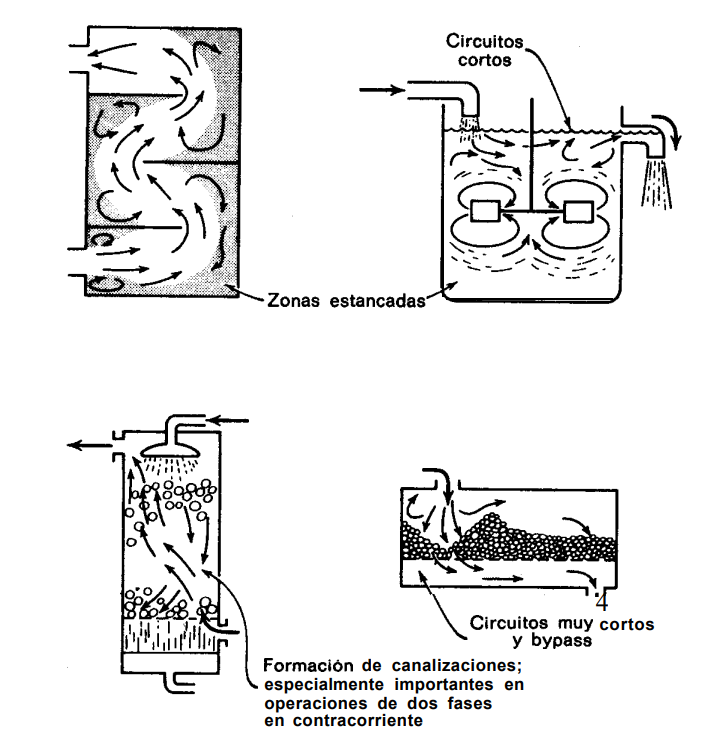

<a href = "http://pubs.sciepub.com/ces/6/1/1/index.html">Articulo</a>

# Reactores de flujo pistón ideales

La edad de salida E(t) de los elementos que pasan por un reactor representa la fracción de materia que sale en distintos tiempos a través del reactor. Sus unidades están en $1/t$.

$E(t) \int_{0}^{\infty} dt = 1$

En un RFP ideal, no hay mezcla y los elementos fluidos salen en el mismo orden en que llegaron. Uno de los modelos más utilizados es el de flujo de pistón, al que se le superpone un mecanismo de dispersión. Este modelo a veces se llama pistón dispersivo.

$E(t) ≈ {\frac{1}{2t}} * \sqrt{\frac{Pe}{π}} * e^{\left[ \frac{-Pe \left( 1 - \frac{t}{\bar t} \right)^2}{4 * \frac{t}{\bar t}} \right] }$ 

$ \sigma^{2}(t) = \left( \frac{2}{Pe} + \frac{8}{Pe^2} \right) * \bar t^{2}$


Si $1/P_e = 0$, el reactor se comporta como un RFP ideal

$
\sigma^2 = \int_{0}^{\infty} \left(t - \bar t \right)^{2} E(t) dt
$

$
E(t) = \frac{C(t)}{\int_{0}^{+ \infty} C(t) dt}
$

$
F(t) = \int_{0}^{\infty} E(t)dt
$

$
\bar t = \int_{0}^{\infty} t * E(t)dt
$

In [20]:
t = np.linspace(0,12,12)
C = np.array([0,0,0.1,1,1.5,2,1.4,1.1,0.1,0,0,0])

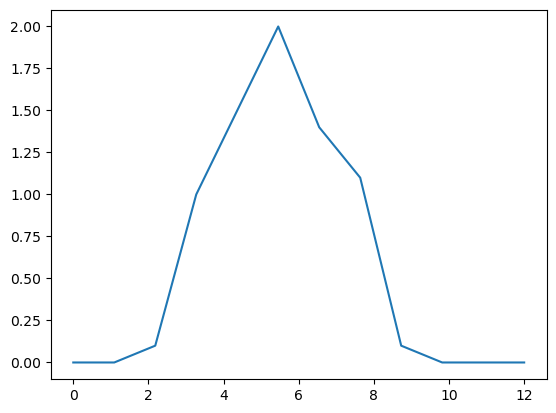

In [21]:
plt.plot(t,C)

In [22]:
dt = [0]
for i in range(11):
    dt.append(t[i+1]-t[i])
dt

[0,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.09090909090909,
 1.0909090909090917,
 1.0909090909090917]

In [23]:
Et = C/(C*dt).sum()

In [24]:
Et

array([0.        , 0.        , 0.01273148, 0.12731481, 0.19097222,
       0.25462963, 0.17824074, 0.1400463 , 0.01273148, 0.        ,
       0.        , 0.        ])

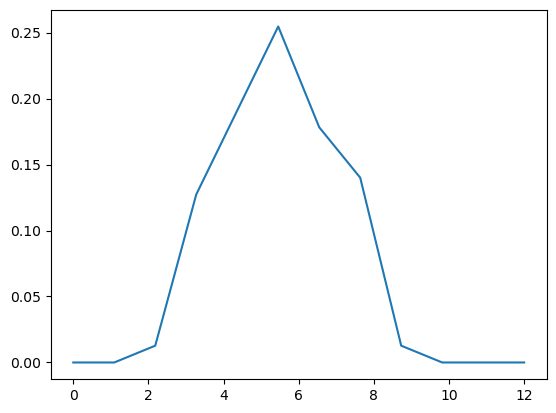

In [25]:
plt.plot(t,Et)

In [26]:
Ft = []
for i in range(12):
    Ft.append((Et[0:i]*dt[0:i]).sum())
Ft

[0.0,
 0.0,
 0.0,
 0.013888888888888888,
 0.1527777777777778,
 0.3611111111111111,
 0.6388888888888888,
 0.8333333333333333,
 0.986111111111111,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999]

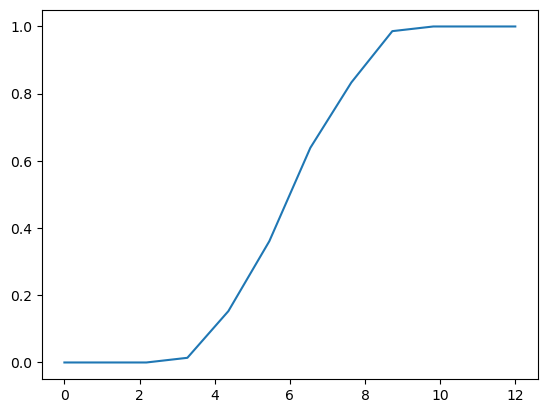

In [27]:
plt.plot(t,Ft)

In [28]:
trh = (t*Et*dt).sum()
trh

5.469696969696969

Text(6, 0.2, 'Tiempo de retención\nHidráulico')

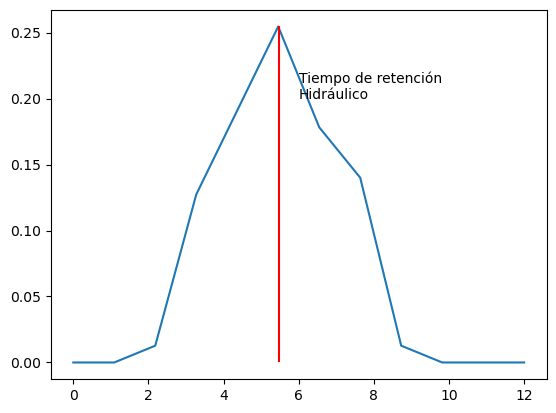

In [29]:
plt.plot(t,Et)
plt.vlines(trh,Et.min(),Et.max(), color="r")
plt.annotate("Tiempo de retención\nHidráulico", (6,0.20))

In [30]:
Varianza = (Et*dt*(t-trh)**2).sum()
Varianza

2.16505968778696

Text(6, 0.2, 'Tiempo de retención\nHidráulico')

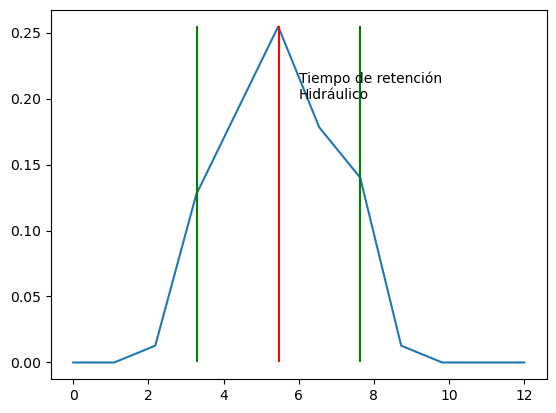

In [31]:
plt.plot(t,Et)
plt.vlines(trh,Et.min(),Et.max(), color="r")
plt.vlines(trh-Varianza,Et.min(),Et.max(), color="g")
plt.vlines(trh+Varianza,Et.min(),Et.max(), color="g")
plt.annotate("Tiempo de retención\nHidráulico", (6,0.20))

# Número de Pe

In [32]:
def Pe(sigmaReal, tprom, PeVali, PeValf, N):
    Pe = np.linspace(PeVali,PeValf,N)
    Sigma = ((2/Pe) + (8/(Pe)**2))*tprom**2
    plt.plot(Sigma,Pe)
    plt.xlabel("$\sigma^2$")
    plt.ylabel("Pe")
    plt.vlines(sigmaReal, Pe.min(), Pe.max(), color="green")
    plt.show()

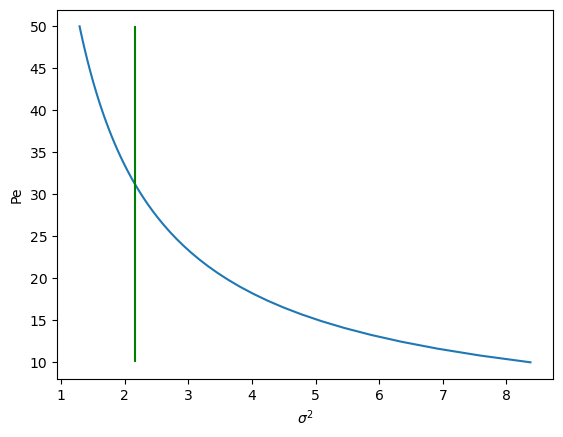

In [33]:
Pe(Varianza, trh, 10, 50, 50)

In [34]:
def Et_f(t,trh,peMin,peMax,Npe):
    pe = np.linspace(peMin,peMax,Npe)
    for i in range(Npe):
        num = -pe[i] *(1- (t/trh))**2
        den= 4*(t/trh)
        Et= (1/(2*t)) * np.sqrt(pe[i]/np.pi) * np.exp(num/den)
        plt.plot(t,Et, label=np.round(1/pe[i],2))
        plt.xlabel("tiempo")
        plt.ylabel("Et")
        plt.legend(title="1/Pe")

C:\Users\valiz\AppData\Local\Temp\ipykernel_27280\2235141156.py:6: RuntimeWarning: divide by zero encountered in divide
  Et= (1/(2*t)) * np.sqrt(pe[i]/np.pi) * np.exp(num/den)
C:\Users\valiz\AppData\Local\Temp\ipykernel_27280\2235141156.py:6: RuntimeWarning: invalid value encountered in multiply
  Et= (1/(2*t)) * np.sqrt(pe[i]/np.pi) * np.exp(num/den)


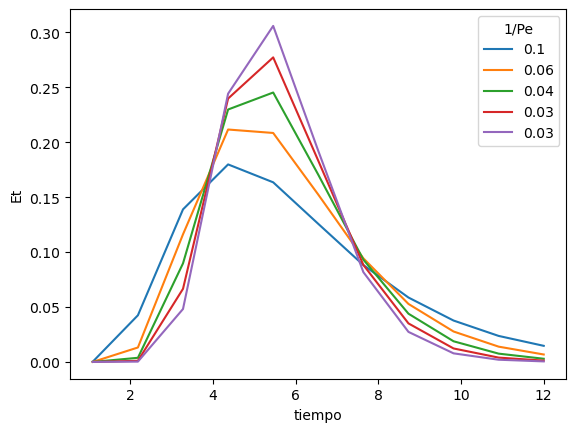

In [35]:
Et_f(t,trh,10,35,5)

# Reactores completamente mezclados ideales

## Cuando $n$ es un entero

$E(t) = \frac{1}{\bar t} * \frac{n^n}{(n-1)!} * \left( \frac{t}{\bar t} \right)^{2} * e^{\frac{-nt}{\bar t}}$

## Cuando $n$ no es un entero

$E(t) = \frac{1}{\bar t} * \frac{n^n}{Γ(n)} * \left( \frac{t}{\bar t} \right)^{2} * e^{\frac{-nt}{\bar t}}$

$\Gamma (n) \approx e^{n} n^{\left( n - \frac{1}{2} \right)} \sqrt{2 \pi} \left( 1 + \frac{1}{12n} + \frac{1}{288n^2} - \frac{139}{51840n^3} - \frac{571}{2488320n^4} \right)$

## Si $n$ supera los 25 reactores asumir como flujo piston, para ello tenga en cuenta:

$Pe = 2n-1$

$\sigma^{2} (t) = \frac{\bar t^2}{n}$

In [36]:
t2 = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]) #min
C2 = np.array([0, 1, 4, 7, 9, 8,  5,  2,  1.5, 1, 0.6, 0.2, 0]) #g/min